In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset (replace 'transactions.csv' with your file)
df = pd.read_csv('../data/raw/data.csv')

In [7]:
# Display dataset info
print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fraud

In [8]:
# Numerical features summary
print("Numerical Features Summary:")
print(df[['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']].describe())

# Categorical features summary
print("\nCategorical Features Summary:")
print(df[['CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']].describe(include='object'))

Numerical Features Summary:
             Amount         Value  CountryCode  PricingStrategy   FraudResult
count  9.566200e+04  9.566200e+04      95662.0     95662.000000  95662.000000
mean   6.717846e+03  9.900584e+03        256.0         2.255974      0.002018
std    1.233068e+05  1.231221e+05          0.0         0.732924      0.044872
min   -1.000000e+06  2.000000e+00        256.0         0.000000      0.000000
25%   -5.000000e+01  2.750000e+02        256.0         2.000000      0.000000
50%    1.000000e+03  1.000000e+03        256.0         2.000000      0.000000
75%    2.800000e+03  5.000000e+03        256.0         2.000000      0.000000
max    9.880000e+06  9.880000e+06        256.0         4.000000      1.000000

Categorical Features Summary:
       CurrencyCode    ProviderId    ProductId     ProductCategory  \
count         95662         95662        95662               95662   
unique            1             6           23                   9   
top             UGX  Provider

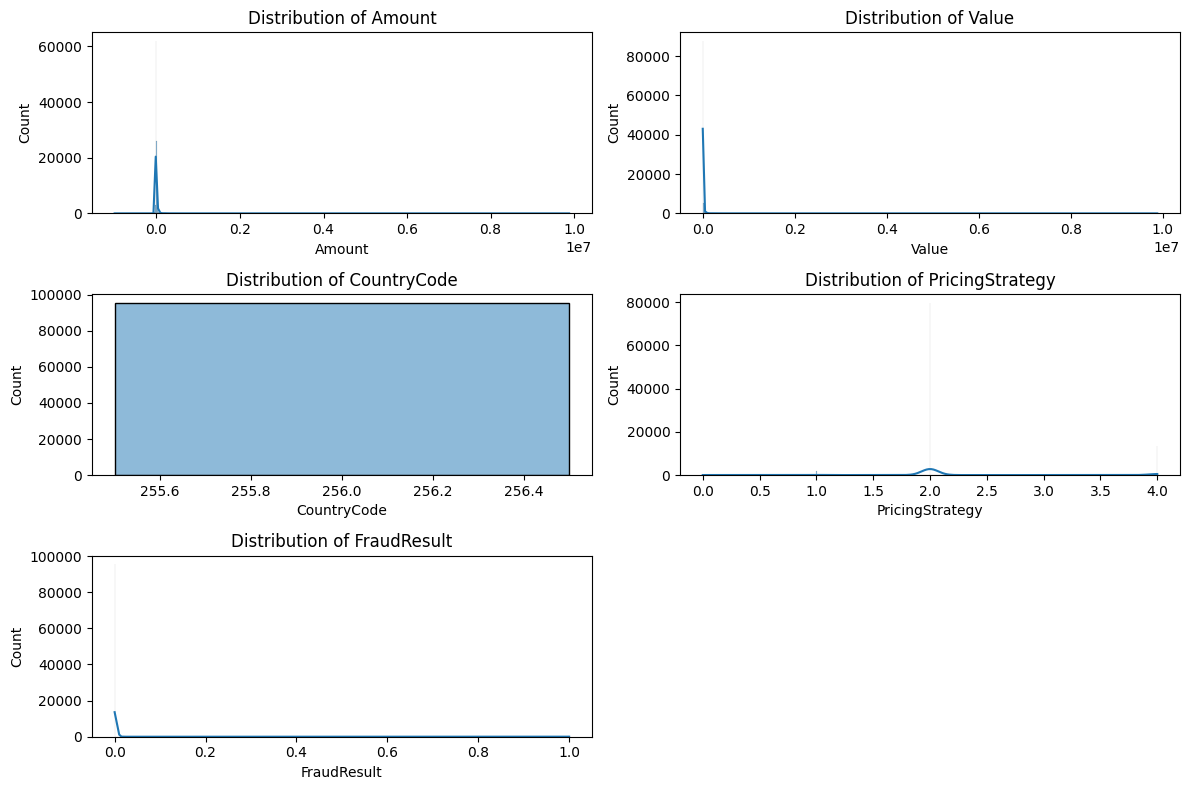

In [9]:
# Numerical columns
numerical_cols = ['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']

# Plot histograms with KDE
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

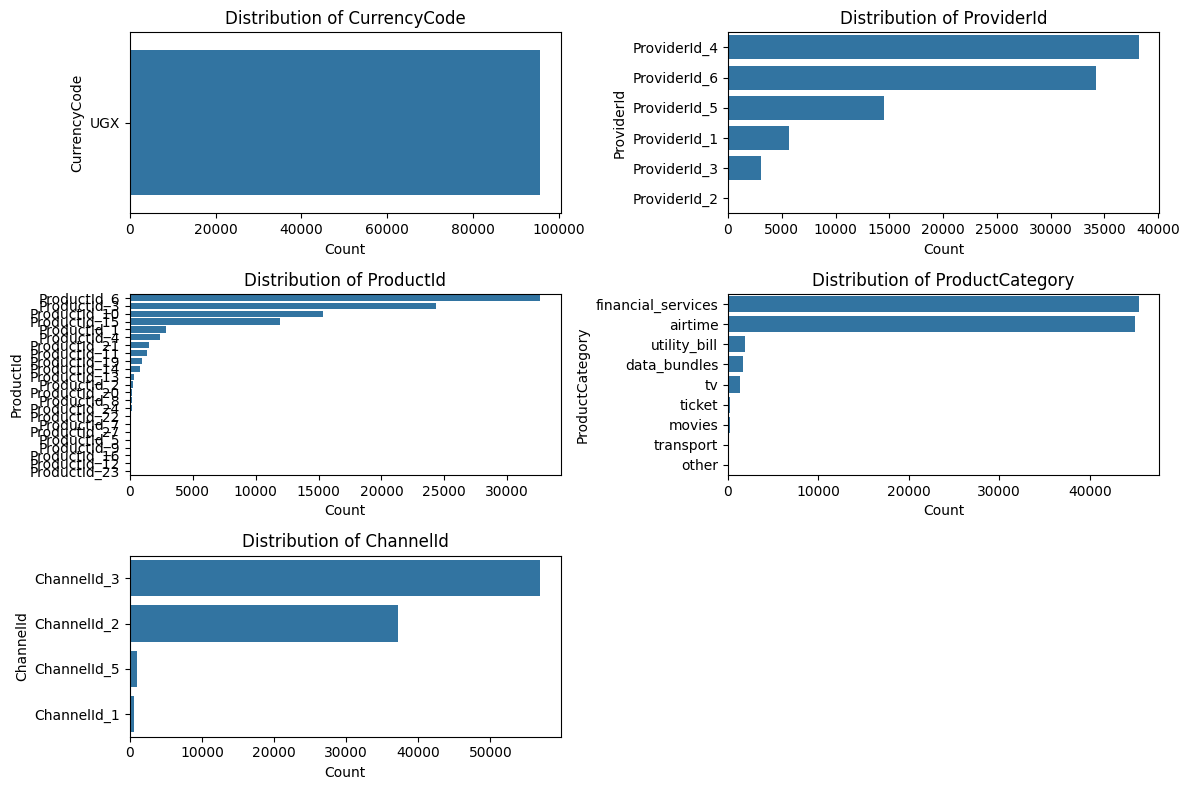

In [10]:
# Categorical columns
categorical_cols = ['CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']

# Plot bar plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


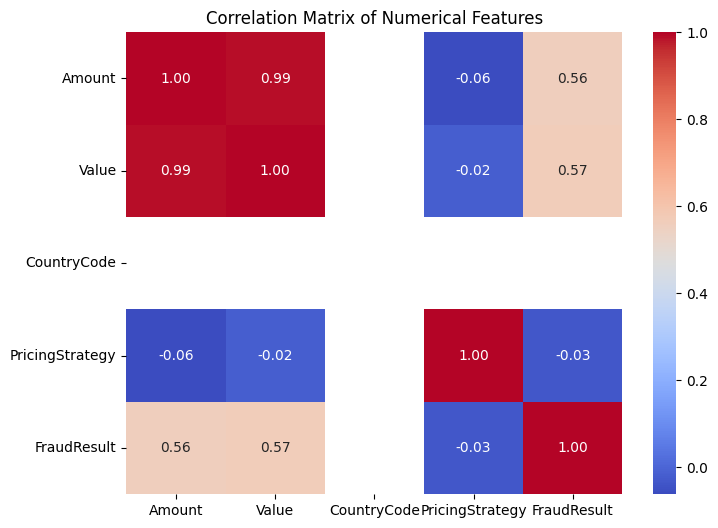

In [11]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


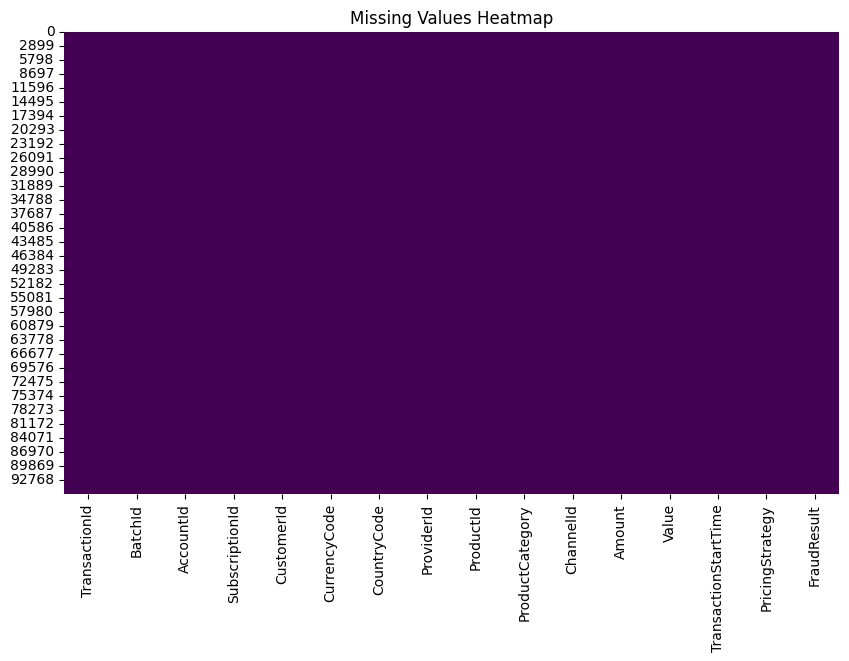

In [12]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

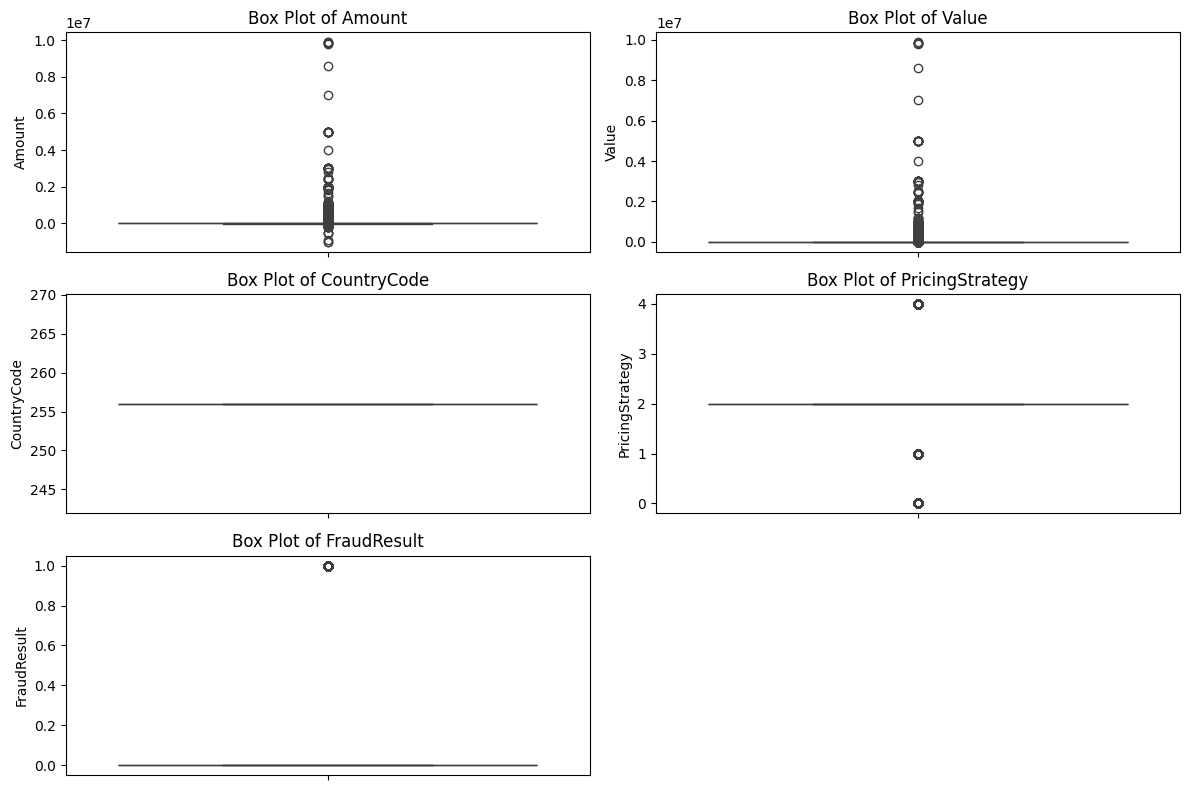

In [13]:
# Plot box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

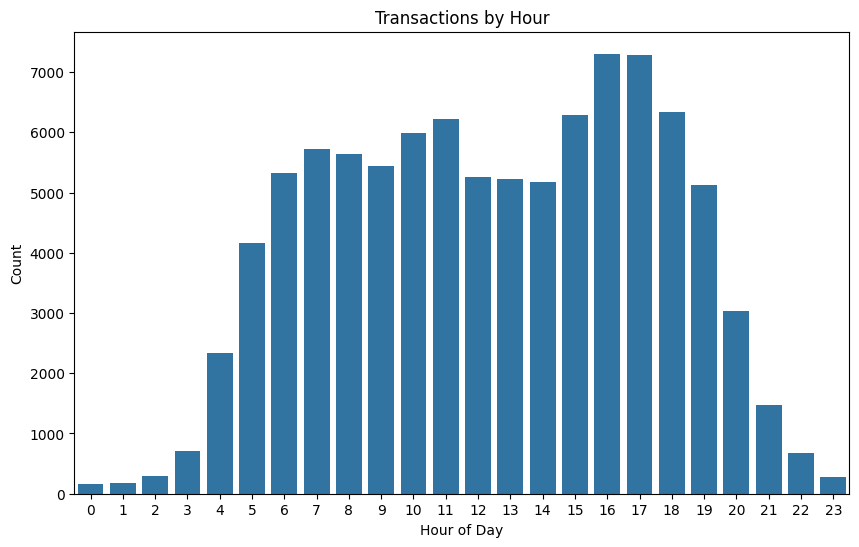

In [14]:
# Convert to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract hour, day, month
df['Hour'] = df['TransactionStartTime'].dt.hour
df['DayOfWeek'] = df['TransactionStartTime'].dt.day_name()
df['Month'] = df['TransactionStartTime'].dt.month

# Plot transactions by hour
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Hour'])
plt.title('Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

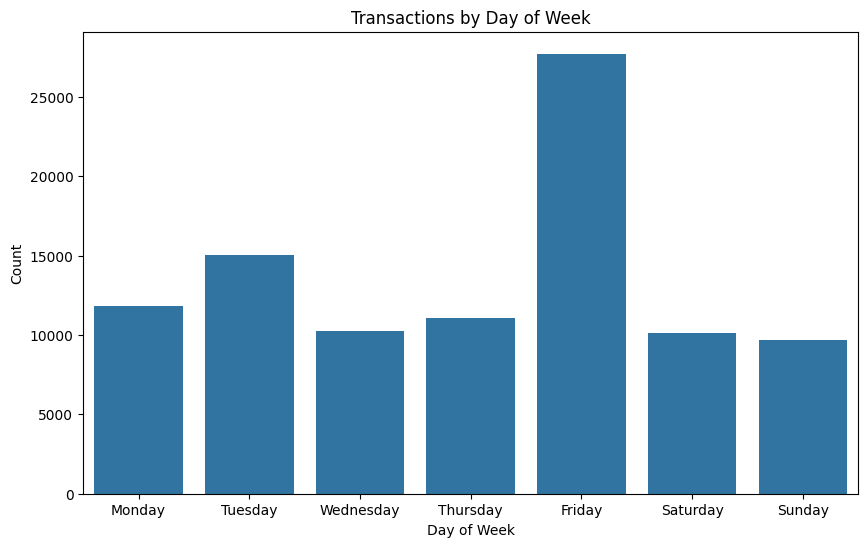

In [15]:
# Plot transactions by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x=df['DayOfWeek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()